In [1]:
import arepo_run as arun
import matplotlib.pylab as plt
import numpy as np
import gadget
# import yt
# import cmasher

#Some constants
gamma    = 5./3
unit_m   = 1.989e43
unit_v   = 1.e5
unit_l   = 3.09567758e21
unit_t   = unit_l/unit_v
unit_rho = unit_m/unit_l**3




In [2]:
#Snapshot
num  = 0
#Read
o  = arun.Run(snappath='/cosma8/data/dp317/dc-naza3/gasCloudNfw/output_refined', snapbase="snap_")
s  = o.loadSnap(snapnum=num)

In [3]:
s.data.keys()

dict_keys(['flga', 'wind', 'pos', 'rho', 'grar', 'edis', 'u', 'mach', 'mass', 'id', 'pres', 'vel', 'vol', 'vort', 'type'])

In [4]:
def plot_multiple(value, num_snaps = 10, axes_plot = [0, 2], vrange = False, center = [500,500,500], box = [1000, 1000], res = 1024, proj = False, proj_fact = 0.5):

    ncols = int(3)
    nrows = int(np.ceil(num_snaps / ncols))

    #Plots a slice nrows rows and ncols columns
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))

    # Common parameters 
    

    o  = arun.Run(snappath='/cosma8/data/dp317/dc-naza3/gasCloudNfw/output_refined', snapbase="snap_")
    
    axes = axes.flatten()

    for ax,i in zip(axes,range(num_snaps+1)):
        s  = o.loadSnap(snapnum=i)

        if value == 'temp':
            kB = 1.381e-16
            mP = 1.66e-24
            xH = 0.76
            meanMolecularWeight = 0.6*mP #4*mP / (1 + 3*xH + 4*xH * s.data['ne'])
            s.data['temp'] = (gamma - 1) * meanMolecularWeight / kB * s.data['u'] * unit_v**2

        if value == 'speed':
            s.data['speed'] = np.linalg.norm(s.data['vel'], axis=1)

        if value == 'vortmag':
            s.data['vortmag'] = np.linalg.norm(s.data['vort'], axis=1)

        if value == 'grar_rho':
            s.data['grar_rho'] = np.linalg.norm(s.data['grar'], axis=1) / s.data['rho']
        
        if value == 'energdens':
            s.data['energdens'] = s.data['u']*s.data['rho']

        plt.sca(ax)
        s.plot_Aslice(value=value, axes=axes_plot, cmap='plasma', colorbar=True, 
                    center=center, box=box, res=res,
                    logplot=True, vrange=vrange, minimum=1e-10, newfig=False, proj=proj, proj_fact=proj_fact)
        plt.xlabel(r'$x \,\rm [kpc]$', fontsize=14)
        plt.ylabel(r'$z \,\rm [kpc]$', fontsize=14)
        plt.title(f'snap {i}')
    
    # Hide unused axes
    for ax in axes[num_snaps+1:]:
        ax.set_visible(False)

    fig.suptitle(value.capitalize(), fontsize=16)

    plt.tight_layout()
    plt.show()
    

Selected 10103 of 2331333 particles.
Selected 27973 of 5821212 particles.
Selected 114040 of 15417342 particles.
Selected 401138 of 56981558 particles.
Selected 397953 of 70059040 particles.
Selected 391006 of 79161436 particles.


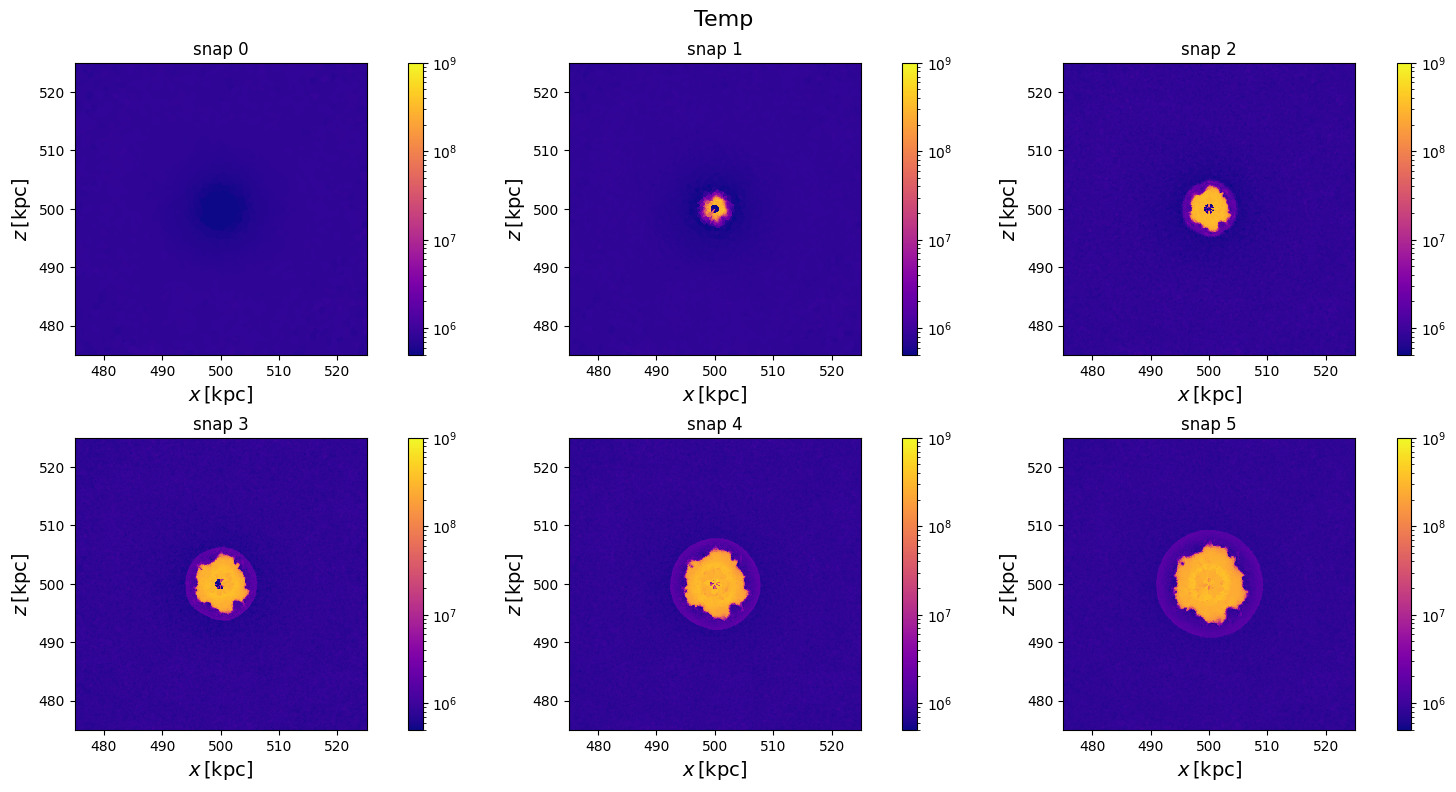

In [11]:
plot_multiple('temp', num_snaps=5, axes_plot=[0, 2], box=[50,50],vrange=(5e5,1e9), proj=False)

In [8]:
np.unique(s.data['flga'])

array([0, 1, 2], dtype=uint32)

Selected 2635241 of 2635241 particles.


KeyboardInterrupt: 

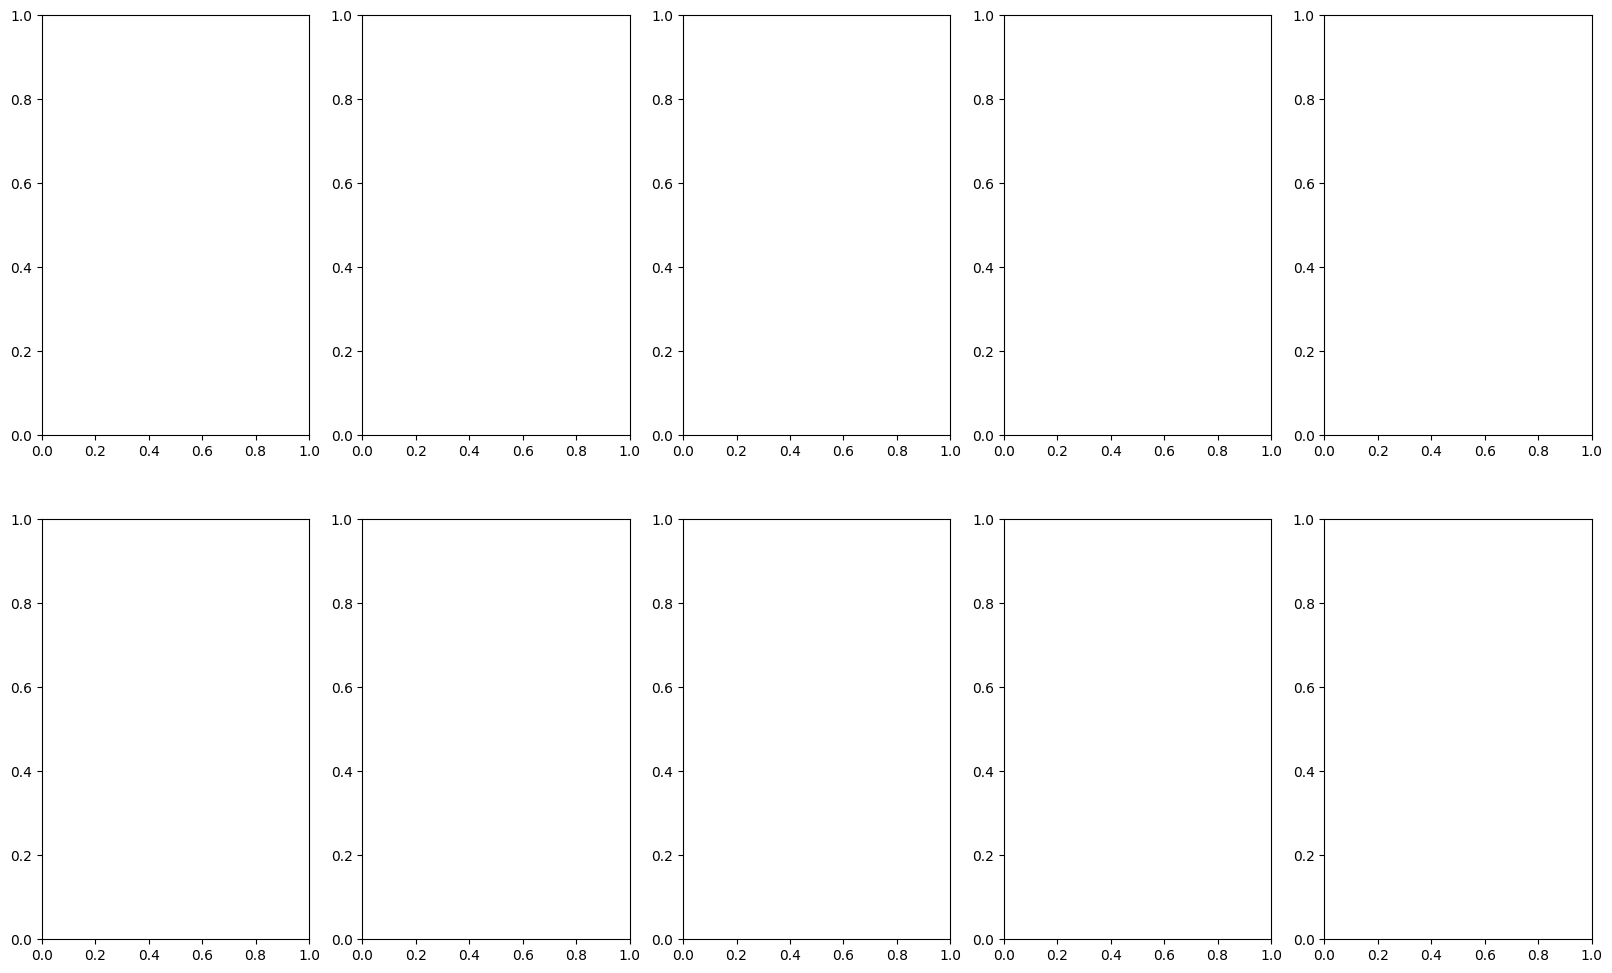

In [5]:
# Create a 2x3 grid of subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 12))

# Common parameters
center = [500,500,500]
box = [1000, 1000]
axes_plot = [0, 2]  # x-z plane
res = 512

o  = arun.Run(snappath='/home/c5046973/agn/gasCloudTest/arepo_t/output', snapbase="snap_")
# Top row - rho, ne, u
# Density (rho)
for idx,(i, j) in enumerate(np.ndindex(axes.shape)):
    s  = o.loadSnap(snapnum=idx)
    plt.sca(axes[i, j])
    s.plot_Aslice(value='rho', axes=axes_plot, cmap='gnuplot', colorbar=True, 
                center=center, box=box, res=res, cblabel=r'$\rho$',
                logplot=True, proj=False, vrange=(1.e-10, 1.e-3), minimum=1e-10, newfig=False)
    plt.xlabel(r'$x \,\rm [kpc]$', fontsize=14)
    plt.ylabel(r'$z \,\rm [kpc]$', fontsize=14)
    plt.title('Density', fontsize=16)

plt.tight_layout()
plt.show()

## without projection

### density

Selected 112530 of 2331333 particles.
Selected 127815 of 2903186 particles.
Selected 127815 of 2903186 particles.
Selected 127815 of 2903186 particles.
Selected 127815 of 2903186 particles.
Selected 127815 of 2903186 particles.
 with 217734 nodes.
Domainlen: 1259.98
Tree creation took 0.022597s
Starting tree walk with 1 thread(s), nx=1024, ny=1024, nz=1, cellx=0.195312, celly=0.195312, cellz=0, cx=500, cy=500, cz=500
Done iter  103 of 1024
Done iter  205 of 1024
Done iter  307 of 1024
Done iter  409 of 1024
Done iter  511 of 1024
Done iter  613 of 1024
Done iter  715 of 1024
Done iter  817 of 1024
Done iter  919 of 1024
Done iter 1021 of 1024
Tree walk took 0.754073s
Calculation took 0.784372s
Creating tree for 72578 particles with 217734 nodes.
Domainlen: 1259.98
Tree creation took 0.022615s
Starting tree walk with 1 thread(s), nx=1024, ny=1024, nz=1, cellx=0.195312, celly=0.195312, cellz=0, cx=500, cy=500, cz=500
Done iter  103 of 1024
Done iter  205 of 1024
Done iter  307 of 1024
Do

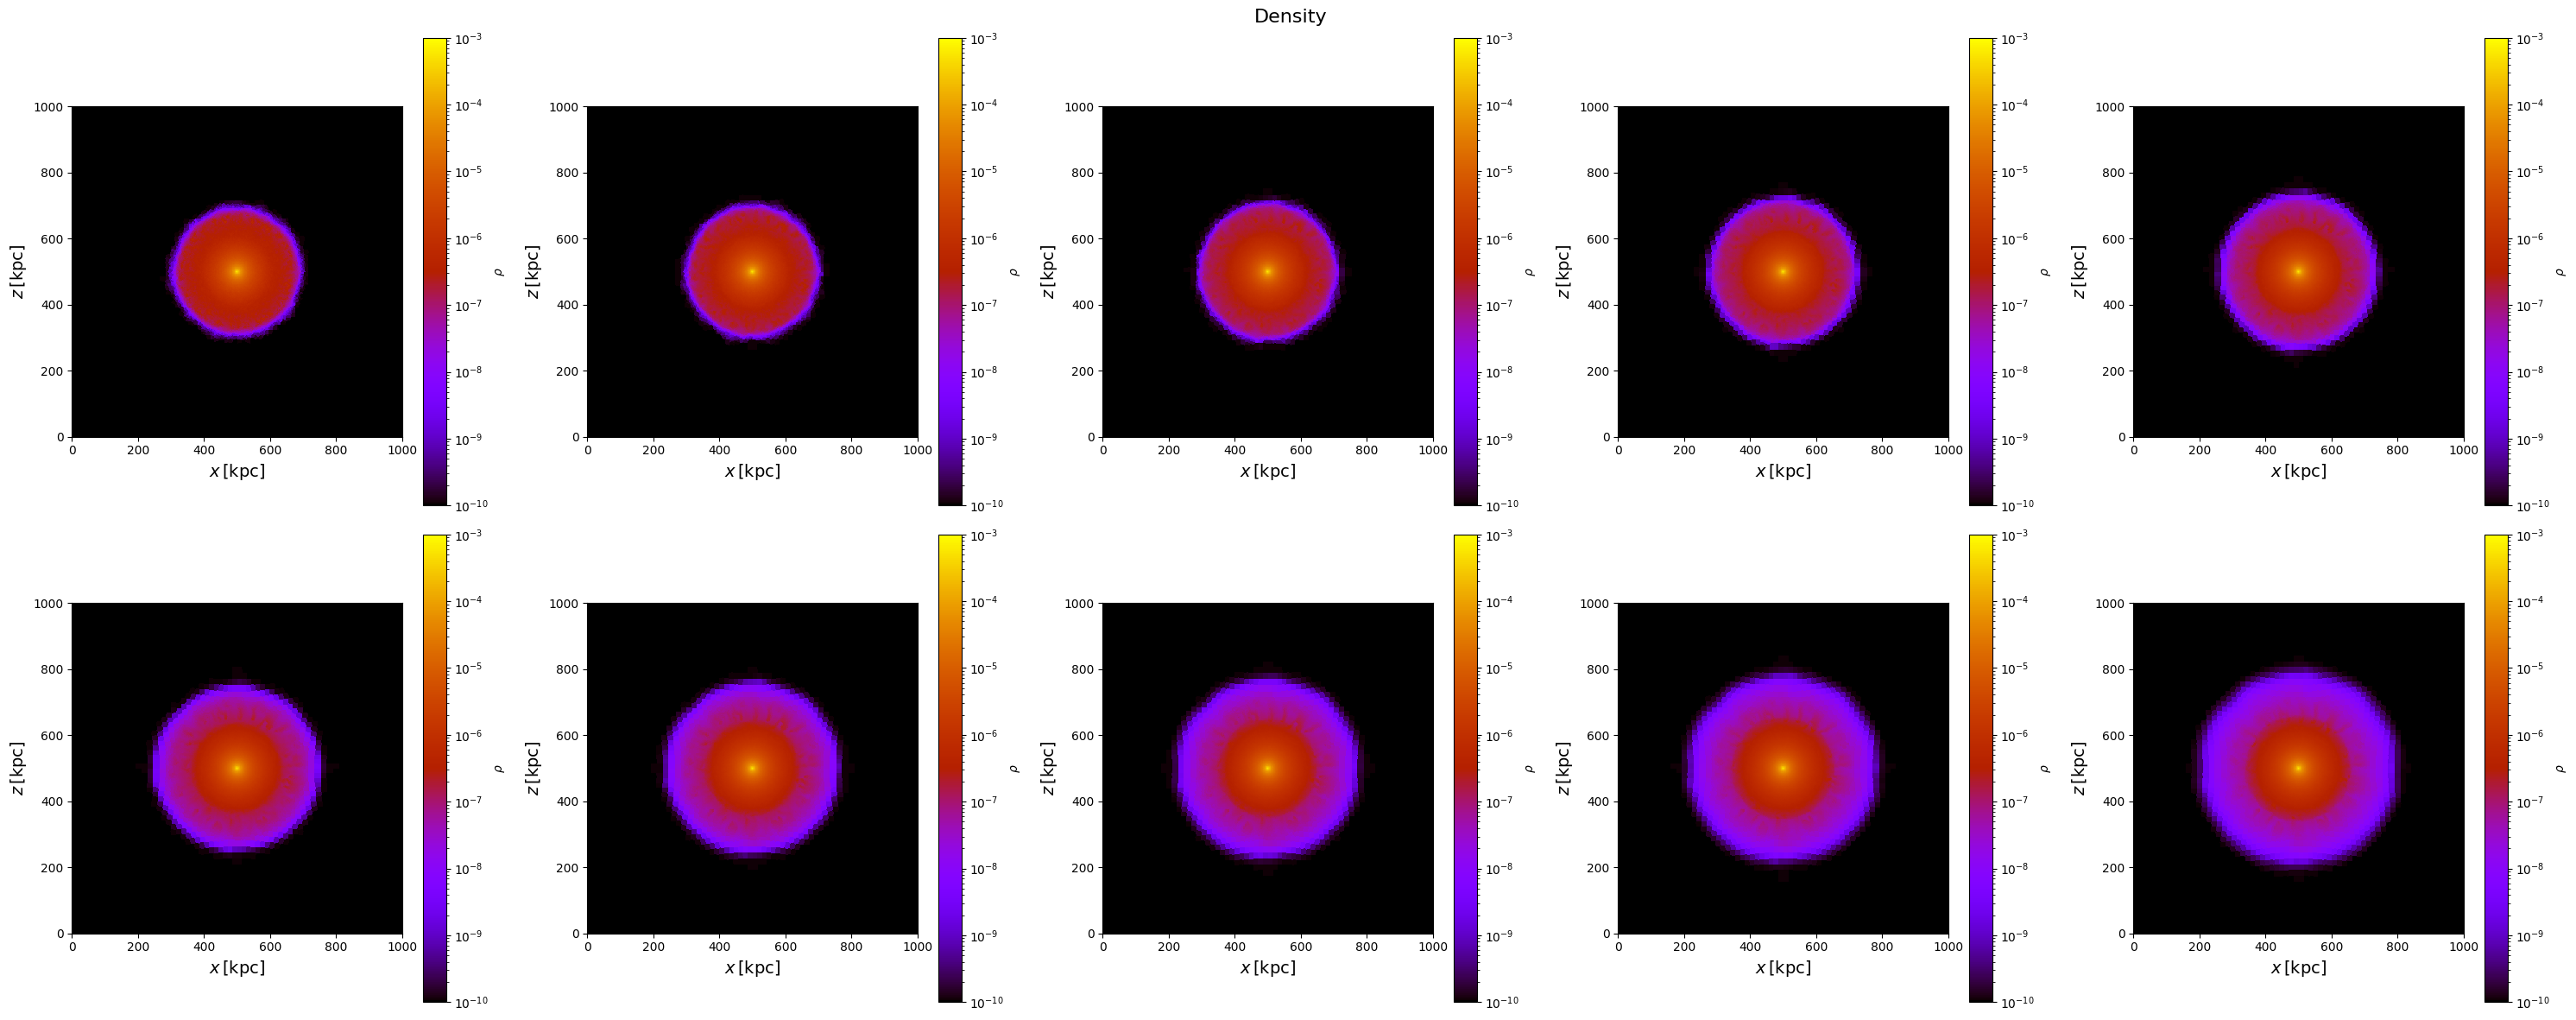

In [4]:
# Create a 2x3 grid of subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(30, 12))

# Common parameters
center = [500,500,500]
box = [1000, 1000]
axes_plot = [0, 2]  # x-z plane
res = 512

o  = arun.Run(snappath='/home/c5046973/agn/gasCloudTest/arepo_t/output_bolalt', snapbase="snap_")
# Top row - rho, ne, u
# Density (rho)
for idx,(i, j) in enumerate(np.ndindex(axes.shape)):
    s  = o.loadSnap(snapnum=idx)
    plt.sca(axes[i, j])
    s.plot_Aslice(value='rho', axes=axes_plot, cmap='gnuplot', colorbar=True, 
                center=center, box=box, res=res, cblabel=r'$\rho$',
                logplot=True, proj=False, vrange=(1.e-10, 1.e-3), minimum=1e-10, newfig=False)
    plt.xlabel(r'$x \,\rm [kpc]$', fontsize=14)
    plt.ylabel(r'$z \,\rm [kpc]$', fontsize=14)
fig.suptitle('Density', fontsize=16)

plt.tight_layout()
plt.show()

### speed

Selected 112530 of 2331333 particles.
Plot range  [0.21610452234745026, 124.9442138671875]
Selected 127815 of 2903186 particles.
Plot range  [0.10254055261611938, 124.71186065673828]
Selected 127815 of 2903186 particles.
Plot range  [0.1474991738796234, 124.9775161743164]
Selected 127815 of 2903186 particles.
Plot range  [0.11248905956745148, 125.08953857421875]
Selected 127815 of 2903186 particles.
Plot range  [0.11309061199426651, 125.11102294921875]
Selected 127815 of 2903186 particles.
Plot range  [0.13425898551940918, 124.75589752197266]
Selected 127815 of 2903186 particles.
len: 2077.33
Tree creation took 0.046716s
Starting tree walk with 1 thread(s), nx=512, ny=512, nz=1, cellx=1.95312, celly=1.95312, cellz=0, cx=500, cy=500, cz=500
Done iter   52 of  512
Done iter  103 of  512
Done iter  154 of  512
Done iter  205 of  512
Done iter  256 of  512
Done iter  307 of  512
Done iter  358 of  512
Done iter  409 of  512
Done iter  460 of  512
Done iter  511 of  512
Tree walk took 0.204

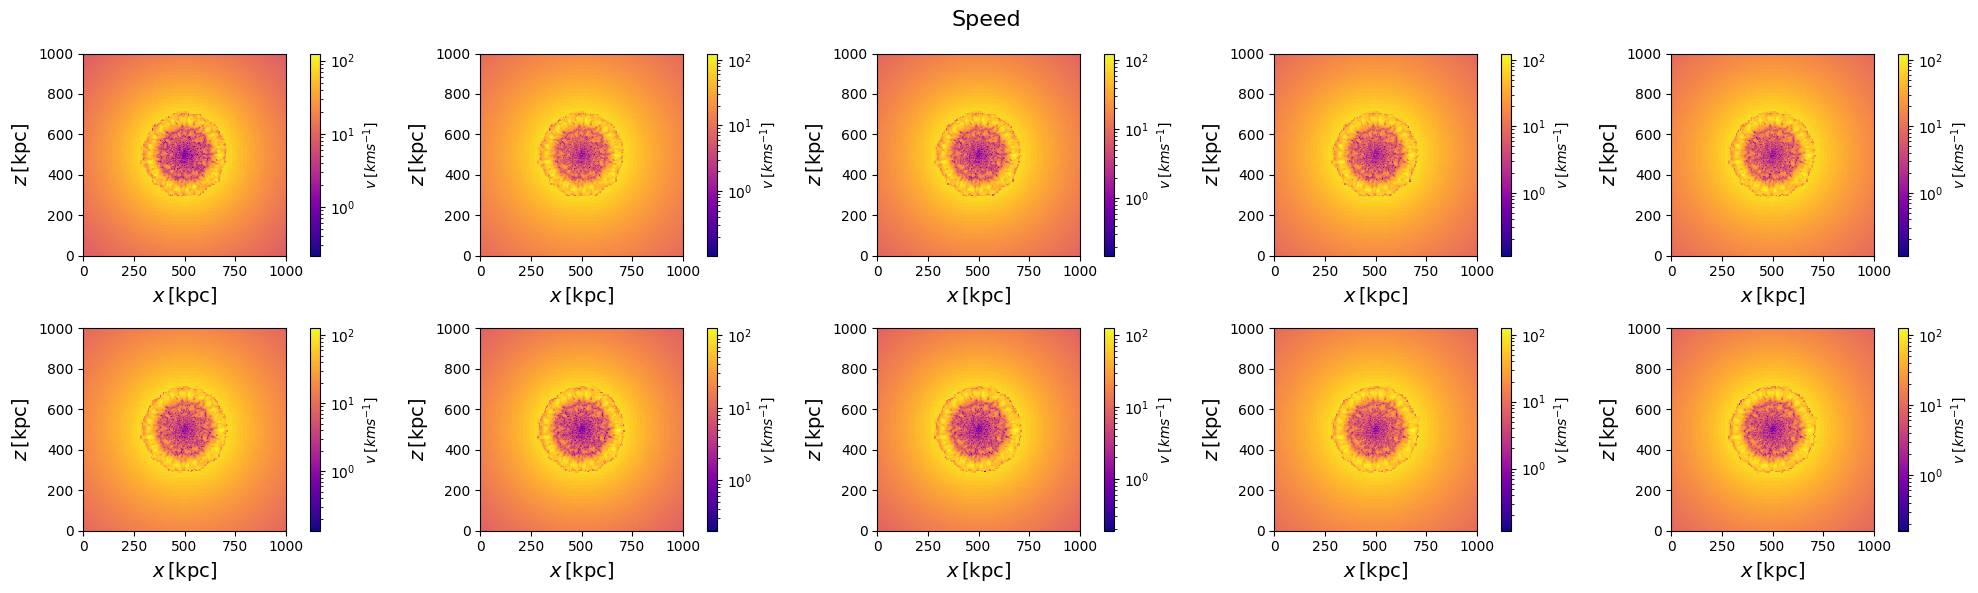

In [4]:
# Create a 2x3 grid of subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 6))

# Common parameters
center = [500,500,500]
box = [1000, 1000]
axes_plot = [0, 2]  # x-z plane
res = 512

o  = arun.Run(snappath='/home/c5046973/agn/gasCloudTest/arepo_t/output_bola', snapbase="snap_")
# Top row - rho, ne, u
# Density (rho)
for idx,(i, j) in enumerate(np.ndindex(axes.shape)):
    s  = o.loadSnap(snapnum=idx)
    s.data['speed']     = np.sqrt(s.data['vel'][:,0]**2 + s.data['vel'][:,1]**2 + s.data['vel'][:,2]**2)
    plt.sca(axes[i, j])
    s.plot_Aslice(value='speed', axes=axes_plot, cmap='plasma', colorbar=True, 
                center=center, box=box, res=res, cblabel=r'$v\;[kms^{-1}]$',
                logplot=True, proj=False,  minimum=1e-10, newfig=False)
    plt.xlabel(r'$x \,\rm [kpc]$', fontsize=14)
    plt.ylabel(r'$z \,\rm [kpc]$', fontsize=14)
fig.suptitle('Speed', fontsize=16)

plt.tight_layout()
plt.show()

### Temperature

Selected 112530 of 2331333 particles.
Plot range  [0.21610452234745026, 124.9442138671875]
Selected 127815 of 2903186 particles.
Plot range  [0.10254055261611938, 124.71186065673828]
Selected 127815 of 2903186 particles.
Plot range  [0.1474991738796234, 124.9775161743164]
Selected 127815 of 2903186 particles.
Plot range  [0.11248905956745148, 125.08953857421875]
Selected 127815 of 2903186 particles.
Plot range  [0.11309061199426651, 125.11102294921875]
Selected 127815 of 2903186 particles.
Plot range  [0.13425898551940918, 124.75589752197266]
Selected 127815 of 2903186 particles.
len: 2077.33
Tree creation took 0.046716s
Starting tree walk with 1 thread(s), nx=512, ny=512, nz=1, cellx=1.95312, celly=1.95312, cellz=0, cx=500, cy=500, cz=500
Done iter   52 of  512
Done iter  103 of  512
Done iter  154 of  512
Done iter  205 of  512
Done iter  256 of  512
Done iter  307 of  512
Done iter  358 of  512
Done iter  409 of  512
Done iter  460 of  512
Done iter  511 of  512
Tree walk took 0.204

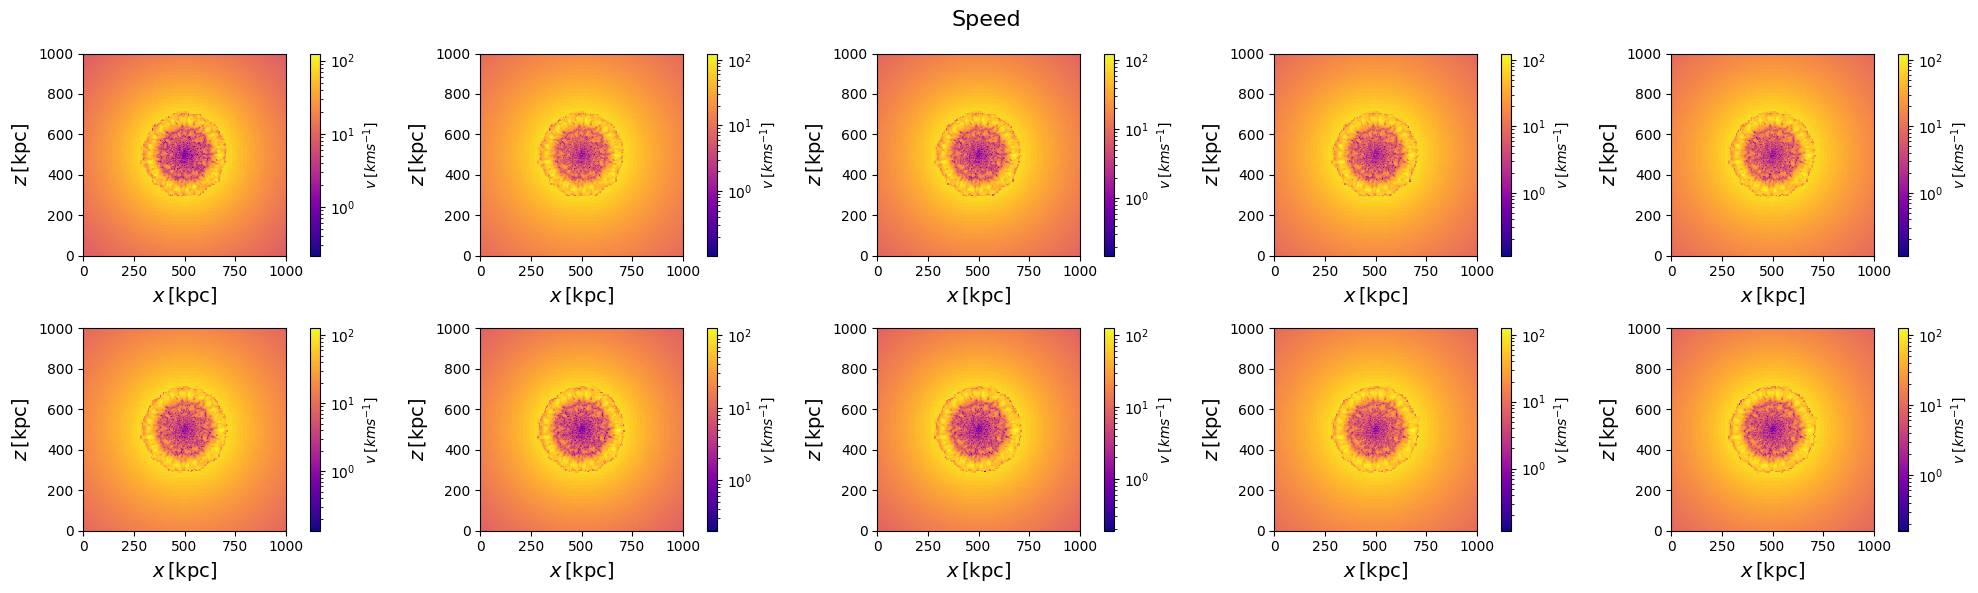

In [ ]:
# Create a 2x3 grid of subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 6))

# Common parameters
center = [500,500,500]
box = [1000, 1000]
axes_plot = [0, 2]  # x-z plane
res = 512

o  = arun.Run(snappath='/home/c5046973/agn/gasCloudTest/arepo_t/output_bola', snapbase="snap_")
# Top row - rho, ne, u
# Density (rho)
for idx,(i, j) in enumerate(np.ndindex(axes.shape)):
    s  = o.loadSnap(snapnum=idx)
    kB       = 1.381e-16
    mP       = 1.66e-24
    xH       = 0.76
    meanMolecularWeight = 4* mP / (1 + 3*xH + 4*xH * s.data['ne'])#/(s.data['rho'] * unit_rho * xH/mP))
    s.data['temp']      = (gamma - 1) * meanMolecularWeight / kB * s.data['u'] * unit_v**2
    plt.sca(axes[i, j])
    s.plot_Aslice(value='speed', axes=axes_plot, cmap='plasma', colorbar=True, 
                center=center, box=box, res=res, cblabel=r'$v\;[kms^{-1}]$',
                logplot=True, proj=False,  minimum=1e-10, newfig=False)
    plt.xlabel(r'$x \,\rm [kpc]$', fontsize=14)
    plt.ylabel(r'$z \,\rm [kpc]$', fontsize=14)
fig.suptitle('Speed', fontsize=16)

plt.tight_layout()
plt.show()

### energy

Selected 112530 of 2331333 particles.
Plot range  [1.0152920484542847, 18131.955078125]
Selected 127815 of 2903186 particles.
Plot range  [1.0152920484542847, 18157.216796875]
Selected 127815 of 2903186 particles.
Plot range  [1.0152920484542847, 18128.140625]
Selected 127815 of 2903186 particles.
Plot range  [1.0152920484542847, 18092.1953125]
Selected 127815 of 2903186 particles.
alk with 1 thread(s), nx=512, ny=512, nz=1, cellx=1.95312, celly=1.95312, cellz=0, cx=500, cy=500, cz=500
Done iter   52 of  512
Done iter  103 of  512
Done iter  154 of  512
Done iter  205 of  512
Done iter  256 of  512
Done iter  307 of  512
Done iter  358 of  512
Done iter  409 of  512
Done iter  460 of  512
Done iter  511 of  512
Tree walk took 0.199177s
Calculation took 0.246177s
Creating tree for 127815 particles with 383445 nodes.
Domainlen: 2077.33
Tree creation took 0.043802s
Starting tree walk with 1 thread(s), nx=512, ny=512, nz=1, cellx=1.95312, celly=1.95312, cellz=0, cx=500, cy=500, cz=500
Done

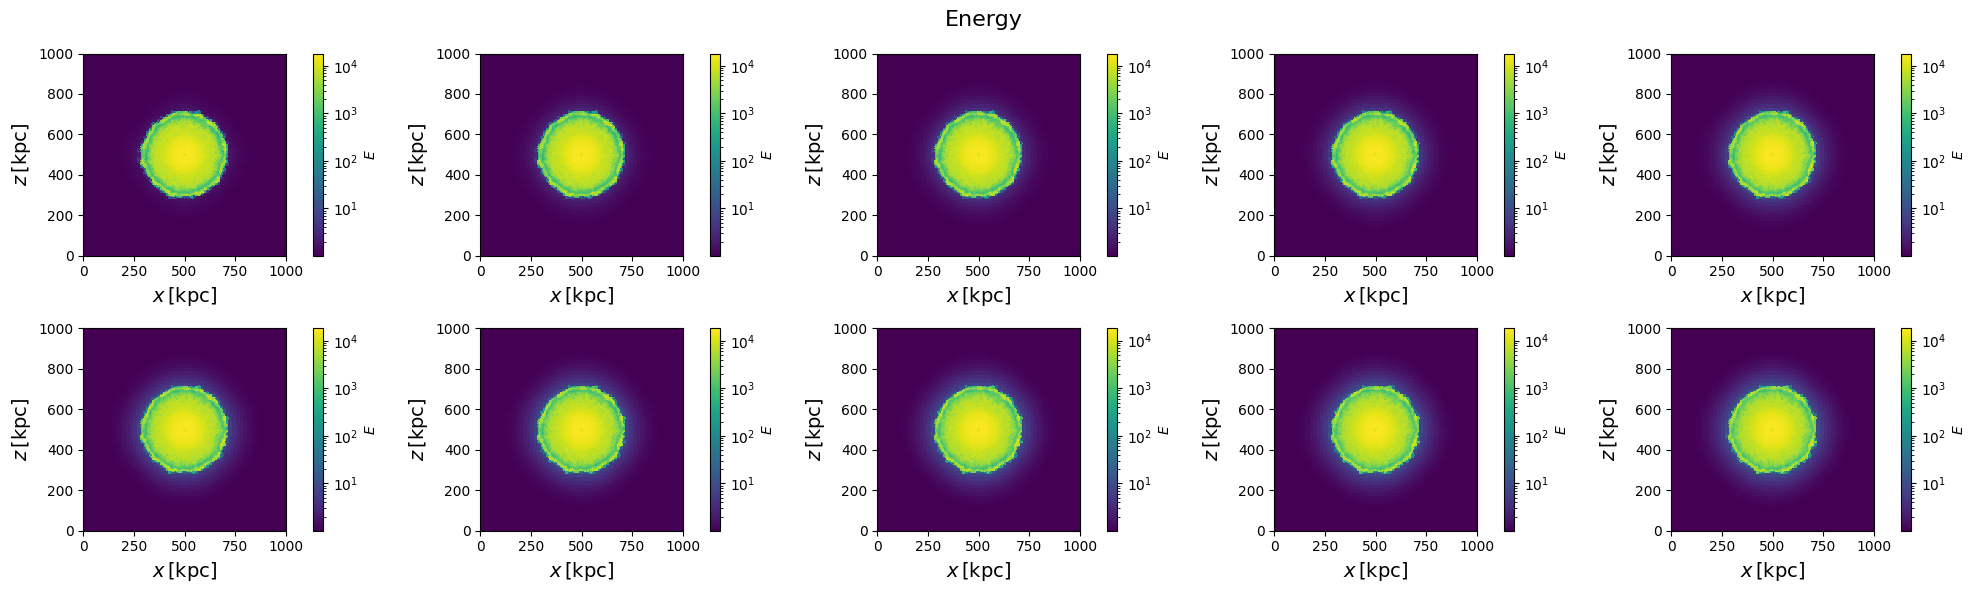

In [5]:
# Create a 2x3 grid of subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 6))

# Common parameters
center = [500,500,500]
box = [1000, 1000]
axes_plot = [0, 2]  # x-z plane
res = 512

o  = arun.Run(snappath='/home/c5046973/agn/gasCloudTest/arepo_t/output_bola', snapbase="snap_")
# Top row - rho, ne, u
# Density (rho)
for idx,(i, j) in enumerate(np.ndindex(axes.shape)):
    s  = o.loadSnap(snapnum=idx)
    plt.sca(axes[i, j])
    s.plot_Aslice(value='u', axes=axes_plot, cmap='viridis', colorbar=True, 
                center=center, box=box, res=res, cblabel=r'$E$',
                logplot=True, proj=False,  minimum=1e-10, newfig=False)
    plt.xlabel(r'$x \,\rm [kpc]$', fontsize=14)
    plt.ylabel(r'$z \,\rm [kpc]$', fontsize=14)
fig.suptitle('Energy', fontsize=16)

plt.tight_layout()
plt.show()

### pressure

Selected 112530 of 2331333 particles.
Plot range  [1e-10, 3.981459379196167]
Selected 127815 of 2903186 particles.
Plot range  [1e-10, 4.366840839385986]
Selected 127815 of 2903186 particles.
 celly=1.95312, cellz=0, cx=500, cy=500, cz=500
Done iter   52 of  512
Done iter  103 of  512
Done iter  154 of  512
Done iter  205 of  512
Done iter  256 of  512
Done iter  307 of  512
Done iter  358 of  512
Done iter  409 of  512
Done iter  460 of  512
Done iter  511 of  512
Tree walk took 0.19495s
Calculation took 0.252947s
Creating tree for 127815 particles with 383445 nodes.
Domainlen: 2077.33
Tree creation took 0.056658s
Starting tree walk with 1 thread(s), nx=512, ny=512, nz=1, cellx=1.95312, celly=1.95312, cellz=0, cx=500, cy=500, cz=500
Done iter   52 of  512
Done iter  103 of  512
Done iter  154 of  512
Done iter  205 of  512
Done iter  256 of  512
Done iter  307 of  512
Done iter  358 of  512
Done iter  409 of  512
Done iter  460 of  512
Done iter  511 of  512
Tree walk took 0.196384s
C

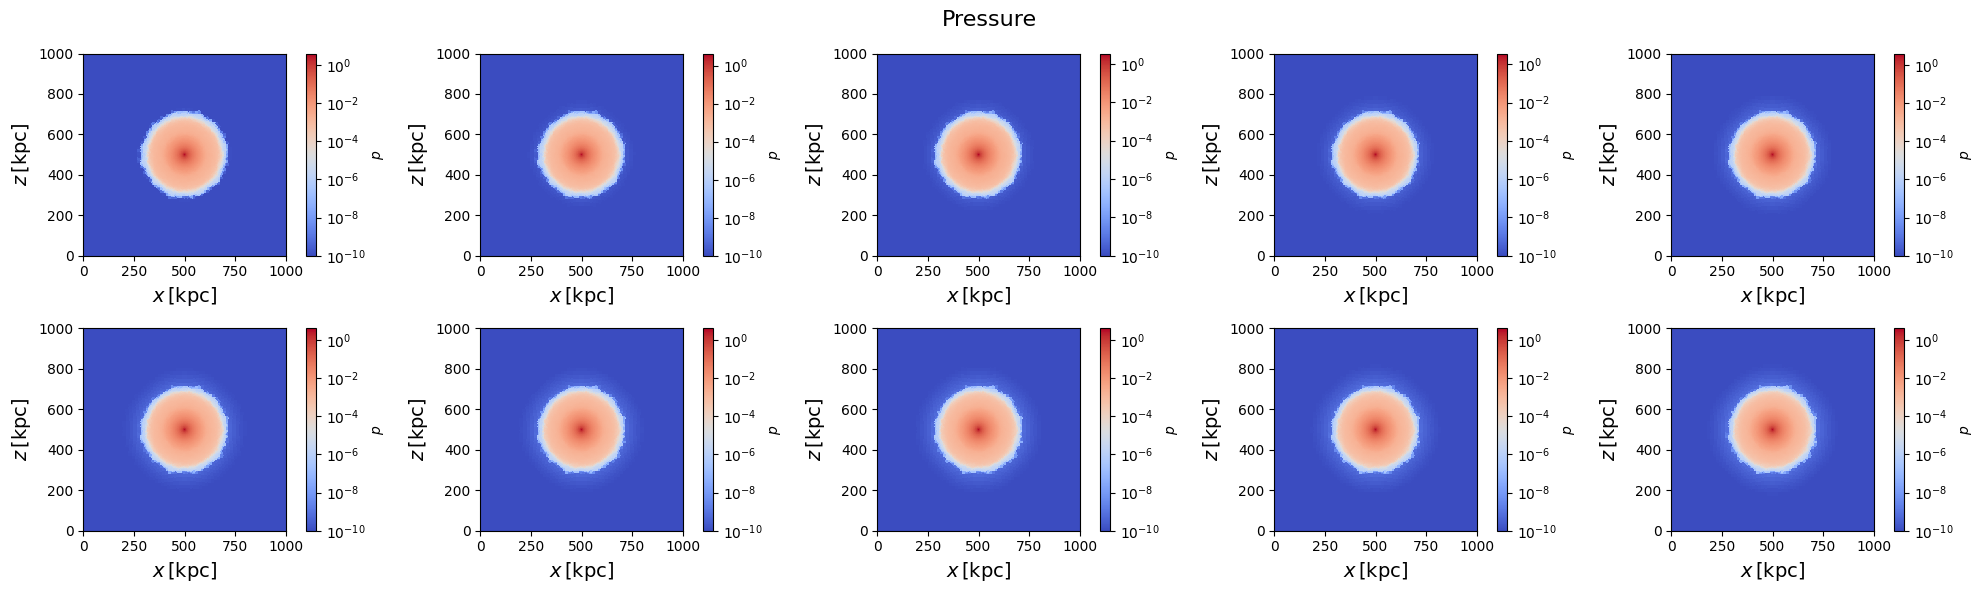

In [6]:
# Create a 2x3 grid of subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 6))

# Common parameters
center = [500,500,500]
box = [1000, 1000]
axes_plot = [0, 2]  # x-z plane
res = 512

o  = arun.Run(snappath='/home/c5046973/agn/gasCloudTest/arepo_t/output_bola', snapbase="snap_")
# Top row - rho, ne, u
# Density (rho)
for idx,(i, j) in enumerate(np.ndindex(axes.shape)):
    s  = o.loadSnap(snapnum=idx)
    plt.sca(axes[i, j])
    s.plot_Aslice(value='pres', axes=axes_plot, cmap='coolwarm', colorbar=True, 
                center=center, box=box, res=res, cblabel=r'$p$',
                logplot=True, proj=False,  minimum=1e-10, newfig=False)
    plt.xlabel(r'$x \,\rm [kpc]$', fontsize=14)
    plt.ylabel(r'$z \,\rm [kpc]$', fontsize=14)
fig.suptitle('Pressure', fontsize=16)

plt.tight_layout()
plt.show()

### mass

Selected 112530 of 2331333 particles.
 52 of  512
Done iter  103 of  512
Done iter  154 of  512
Done iter  205 of  512
Done iter  256 of  512
Done iter  307 of  512
Done iter  358 of  512
Done iter  409 of  512
Done iter  460 of  512
Done iter  511 of  512
Tree walk took 0.16931s
Calculation took 0.222351s
Creating tree for 127815 particles with 383445 nodes.
Domainlen: 2077.33
Tree creation took 0.05275s
Starting tree walk with 1 thread(s), nx=512, ny=512, nz=1, cellx=1.95312, celly=1.95312, cellz=0, cx=500, cy=500, cz=500
Done iter   52 of  512
Done iter  103 of  512
Done iter  154 of  512
Done iter  205 of  512
Done iter  256 of  512
Done iter  307 of  512
Done iter  358 of  512
Done iter  409 of  512
Done iter  460 of  512
Done iter  511 of  512
Tree walk took 0.169542s
Calculation took 0.224171s
Creating tree for 127815 particles with 383445 nodes.
Domainlen: 2077.33
Tree creation took 0.053662s
Starting tree walk with 1 thread(s), nx=512, ny=512, nz=1, cellx=1.95312, celly=1.9531

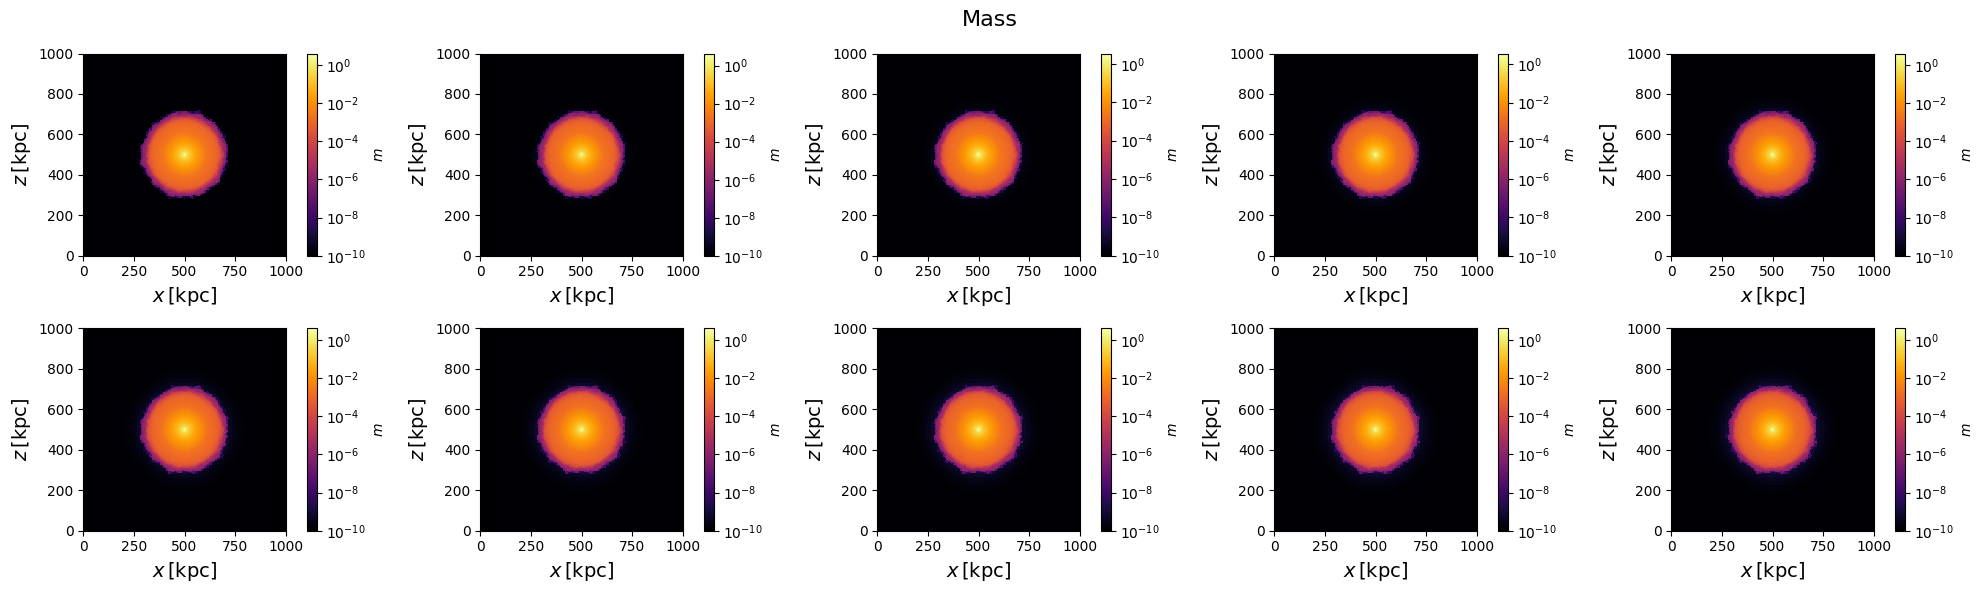

In [7]:
# Create a 2x3 grid of subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 6))

# Common parameters
center = [500,500,500]
box = [1000, 1000]
axes_plot = [0, 2]  # x-z plane
res = 512

o  = arun.Run(snappath='/home/c5046973/agn/gasCloudTest/arepo_t/output_bola', snapbase="snap_")
# Top row - rho, ne, u
# Density (rho)
for idx,(i, j) in enumerate(np.ndindex(axes.shape)):
    s  = o.loadSnap(snapnum=idx)
    plt.sca(axes[i, j])
    s.plot_Aslice(value='pres', axes=axes_plot, cmap='inferno', colorbar=True, 
                center=center, box=box, res=res, cblabel=r'$m$',
                logplot=True, proj=False,  minimum=1e-10, newfig=False)
    plt.xlabel(r'$x \,\rm [kpc]$', fontsize=14)
    plt.ylabel(r'$z \,\rm [kpc]$', fontsize=14)
fig.suptitle('Mass', fontsize=16)

plt.tight_layout()
plt.show()

### vortcity magnitude

Selected 131641 of 2635241 particles.
Plot range  [1e-10, 1e-10]
Selected 110512 of 2309674 particles.
n took 0.024359s
Starting tree walk with 1 thread(s), nx=512, ny=512, nz=1, cellx=1.95312, celly=1.95312, cellz=0, cx=500, cy=500, cz=500
Done iter   52 of  512
Done iter  103 of  512
Done iter  154 of  512
Done iter  205 of  512
Done iter  256 of  512
Done iter  307 of  512
Done iter  358 of  512
Done iter  409 of  512
Done iter  460 of  512
Done iter  511 of  512
Tree walk took 0.160889s
Calculation took 0.186888s
Creating tree for 109730 particles with 329190 nodes.
Domainlen: 2082.81
Tree creation took 0.021433s
Starting tree walk with 1 thread(s), nx=512, ny=512, nz=1, cellx=1.95312, celly=1.95312, cellz=0, cx=500, cy=500, cz=500
Done iter   52 of  512
Done iter  103 of  512
Done iter  154 of  512
Done iter  205 of  512
Done iter  256 of  512
Done iter  307 of  512
Done iter  358 of  512
Done iter  409 of  512
Done iter  460 of  512
Done iter  511 of  512
Tree walk took 0.154146s

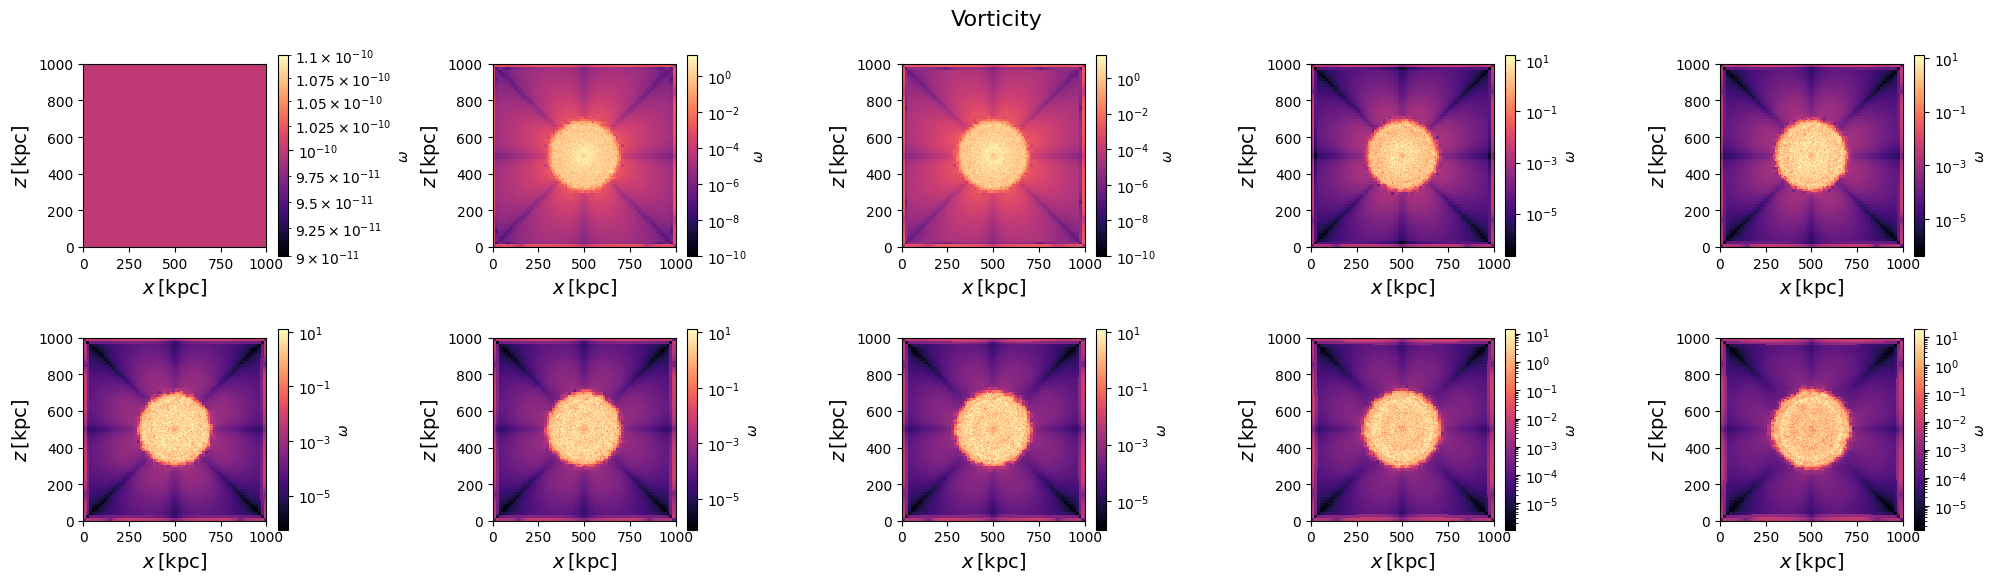

In [16]:
# Create a 2x3 grid of subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 6))

# Common parameters
center = [500,500,500]
box = [1000, 1000]
axes_plot = [0, 2]  # x-z plane
res = 512

o  = arun.Run(snappath='/home/c5046973/agn/gasCloudTest/arepo_t/output_lt', snapbase="snap_")
# Top row - rho, ne, u
# Density (rho)
for idx,(i, j) in enumerate(np.ndindex(axes.shape)):
    s  = o.loadSnap(snapnum=idx)
    s.data['vortmag']     = np.sqrt(s.data['vort'][:,0]**2 + s.data['vort'][:,1]**2 + s.data['vort'][:,2]**2)
    plt.sca(axes[i, j])
    s.plot_Aslice(value='vortmag', axes=axes_plot, cmap='magma', colorbar=True, 
                center=center, box=box, res=res, cblabel=r'$\omega$',
                logplot=True, proj=False,  minimum=1e-10, newfig=False)
    plt.xlabel(r'$x \,\rm [kpc]$', fontsize=14)
    plt.ylabel(r'$z \,\rm [kpc]$', fontsize=14)
fig.suptitle('Vorticity', fontsize=16)

plt.tight_layout()
plt.show()

### helicity density $v\cdot \omega$

Selected 131641 of 2635241 particles.
Plot range  [1e-10, 1e-10]
Selected 110512 of 2309674 particles.
Plot range  [1e-10, 125.85073852539062]
Selected 109884 of 2311336 particles.
Plot range  [1e-10, 205.31494140625]
Selected 109703 of 2312897 particles.
Plot range  [1e-10, 128.12998962402344]
Selected 109730 of 2314541 particles.
Plot range  [1e-10, 148.11761474609375]
Selected 109861 of 2316383 particles.
Plot range  [1e-10, 135.1741943359375]
Selected 110237 of 2318345 particles.
Plot range  [1e-10, 197.78082275390625]
Selected 110405 of 2320750 particles.
0, cy=500, cz=500
Done iter   52 of  512
Done iter  103 of  512
Done iter  154 of  512
Done iter  205 of  512
Done iter  256 of  512
Done iter  307 of  512
Done iter  358 of  512
Done iter  409 of  512
Done iter  460 of  512
Done iter  511 of  512
Tree walk took 0.16009s
Calculation took 0.184823s
Creating tree for 131641 particles with 394923 nodes.
Domainlen: 2083.86
Tree creation took 0.027525s
Starting tree walk with 1 thread

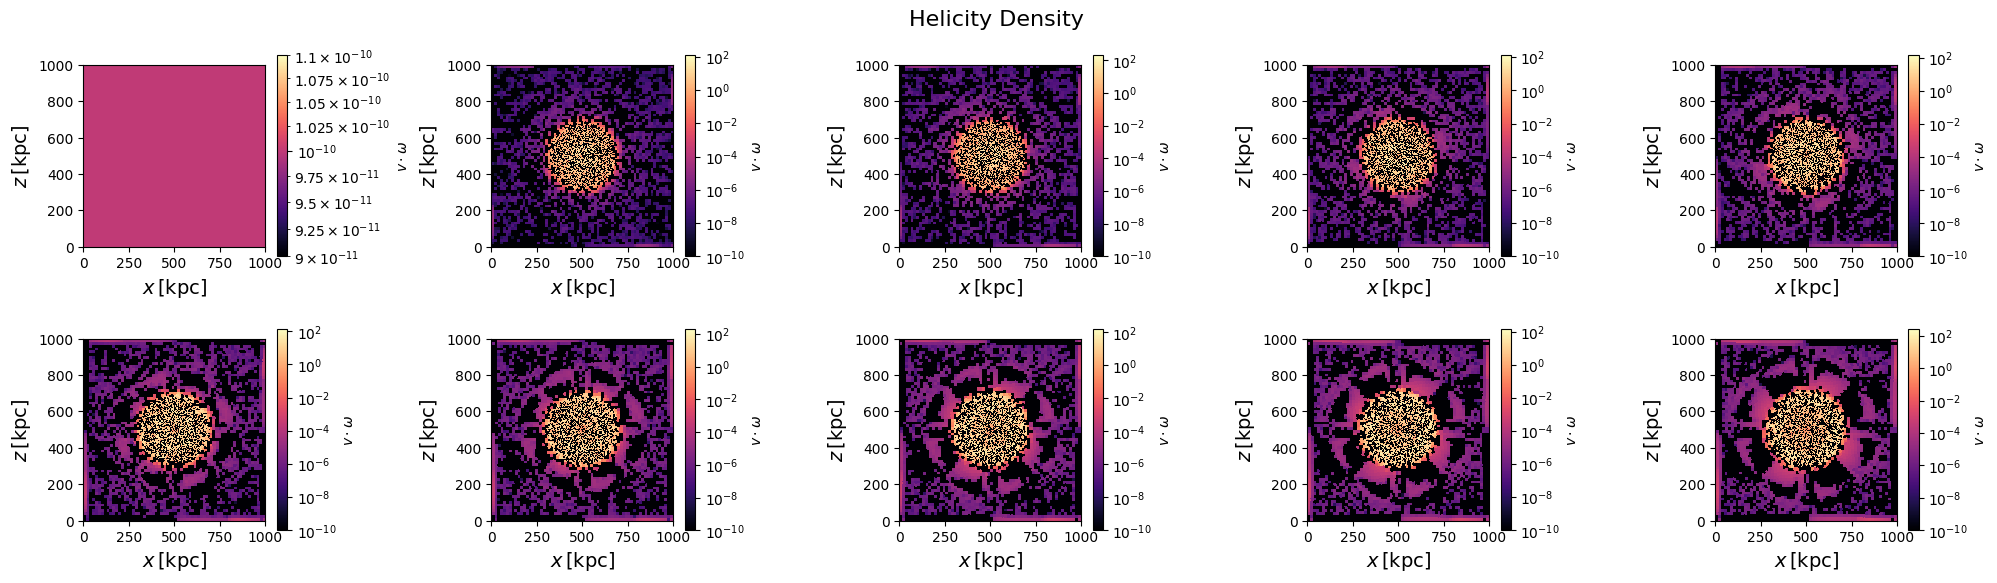

In [17]:
# Create a 2x3 grid of subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 6))

# Common parameters
center = [500,500,500]
box = [1000, 1000]
axes_plot = [0, 2]  # x-z plane
res = 512

o  = arun.Run(snappath='/home/c5046973/agn/gasCloudTest/arepo_t/output_lt', snapbase="snap_")
# Top row - rho, ne, u
# Density (rho)
for idx,(i, j) in enumerate(np.ndindex(axes.shape)):
    s  = o.loadSnap(snapnum=idx)
    s.data['heldens']     = np.einsum('ij,ij->i',s.vort,s.vel)
    plt.sca(axes[i, j])
    s.plot_Aslice(value='heldens', axes=axes_plot, cmap='magma', colorbar=True, 
                center=center, box=box, res=res, cblabel=r'$v\cdot \omega$',
                logplot=True, proj=False,  minimum=1e-10, newfig=False)
    plt.xlabel(r'$x \,\rm [kpc]$', fontsize=14)
    plt.ylabel(r'$z \,\rm [kpc]$', fontsize=14)
fig.suptitle('Helicity Density', fontsize=16)

plt.tight_layout()
plt.show()

### Density gradient

Selected 131641 of 2635241 particles.
Selected 110512 of 2309674 particles.
Selected 109884 of 2311336 particles.
Selected 109703 of 2312897 particles.
Selected 109730 of 2314541 particles.
Selected 109861 of 2316383 particles.
Selected 110237 of 2318345 particles.
: 2079.68
Tree creation took 0.024873s
Starting tree walk with 1 thread(s), nx=512, ny=512, nz=1, cellx=1.95312, celly=1.95312, cellz=0, cx=500, cy=500, cz=500
Done iter   52 of  512
Done iter  103 of  512
Done iter  154 of  512
Done iter  205 of  512
Done iter  256 of  512
Done iter  307 of  512
Done iter  358 of  512
Done iter  409 of  512
Done iter  460 of  512
Done iter  511 of  512
Tree walk took 0.154418s
Calculation took 0.182655s
Creating tree for 111090 particles with 333270 nodes.
Domainlen: 2078.57
Tree creation took 0.025138s
Starting tree walk with 1 thread(s), nx=512, ny=512, nz=1, cellx=1.95312, celly=1.95312, cellz=0, cx=500, cy=500, cz=500
Done iter   52 of  512
Done iter  103 of  512
Done iter  154 of  512


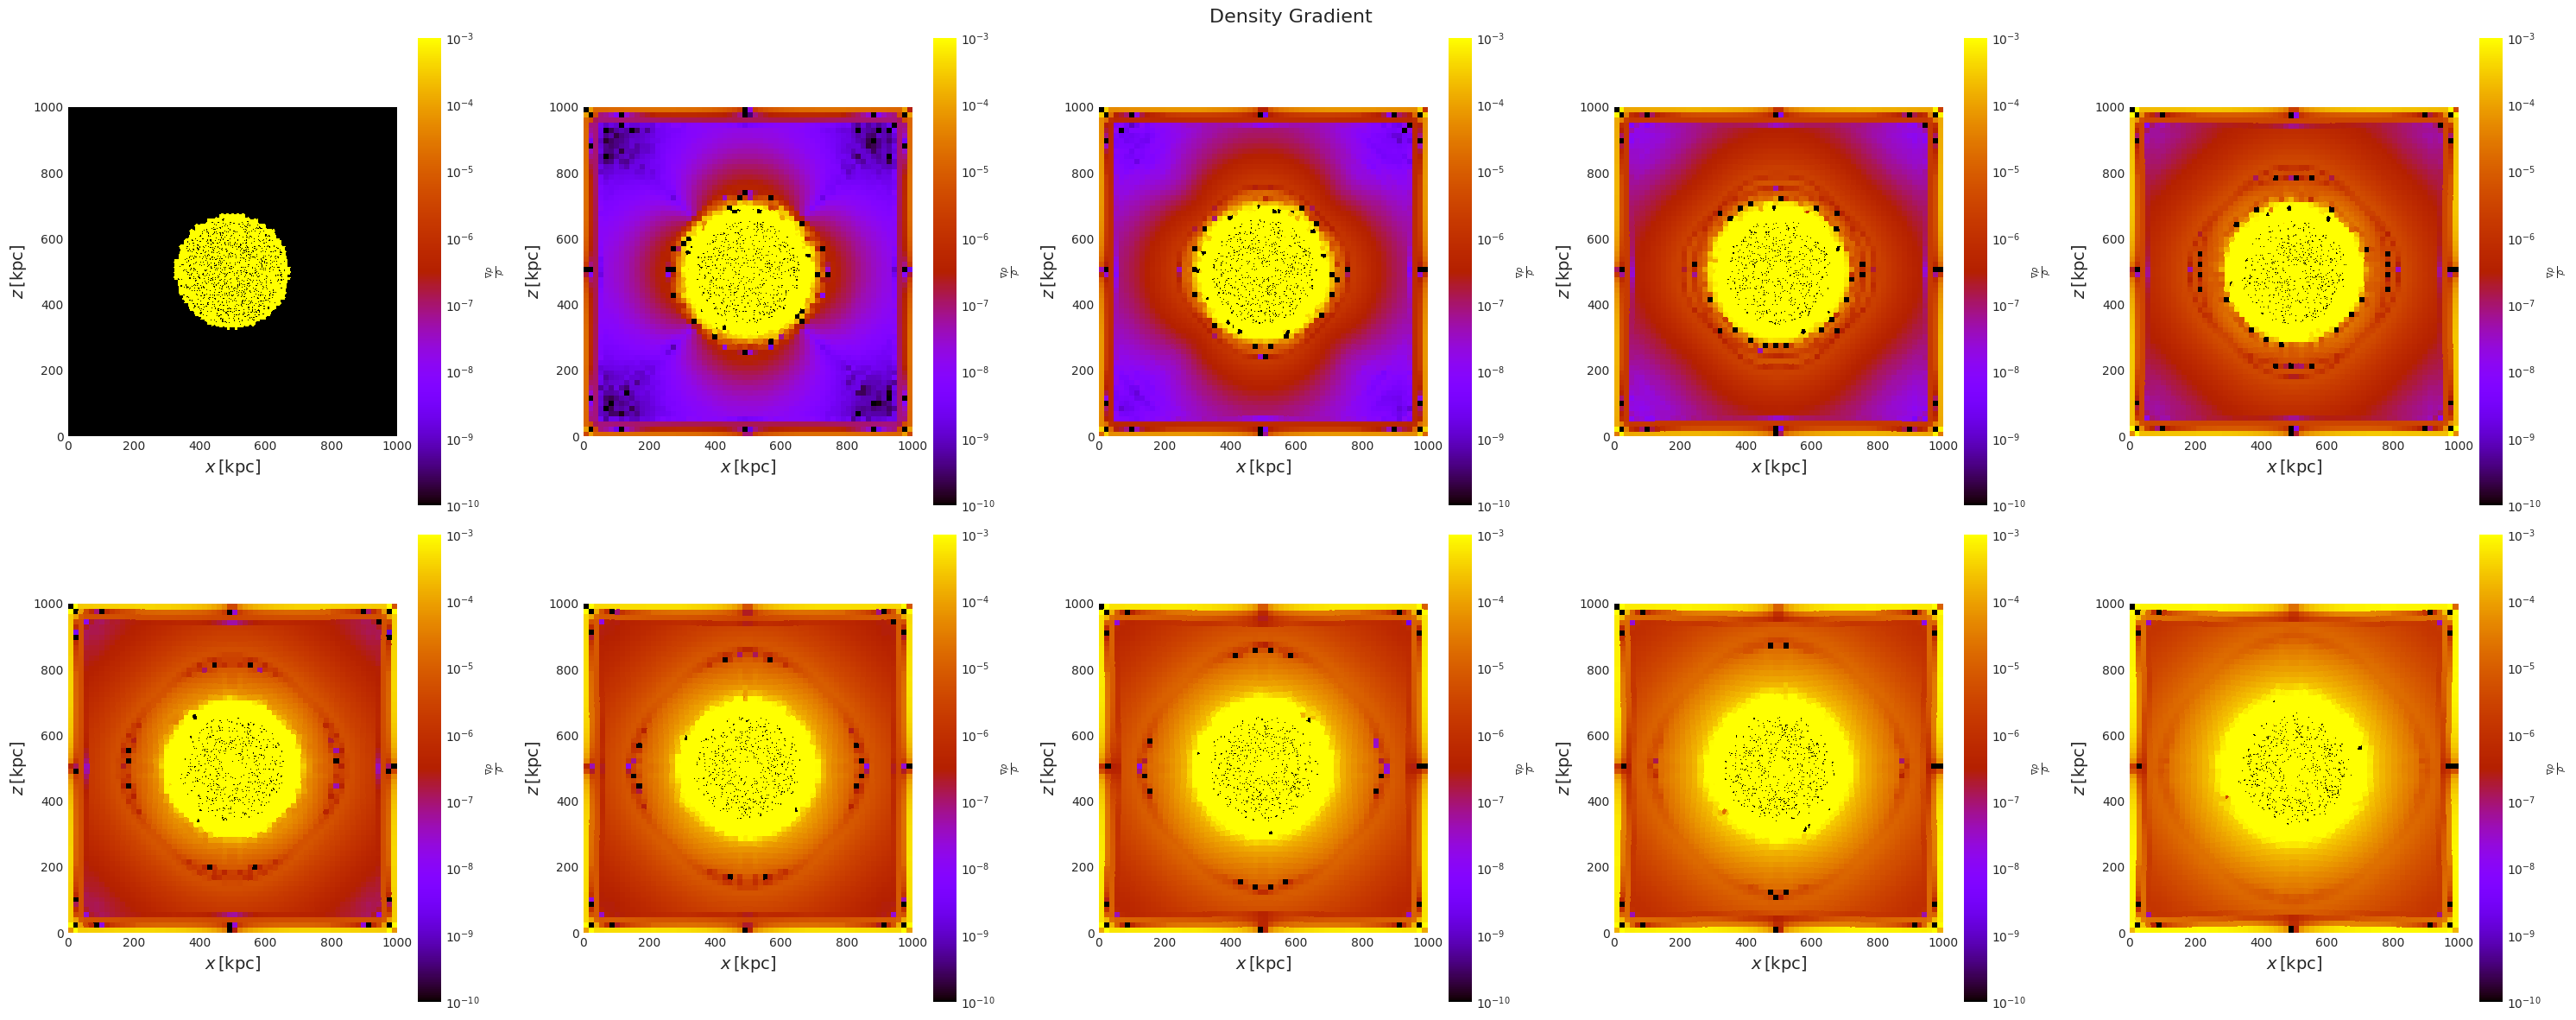

In [19]:
# Create a 2x3 grid of subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(30, 12))

# Common parameters
center = [500,500,500]
box = [1000, 1000]
axes_plot = [0, 2]  # x-z plane
res = 512

o  = arun.Run(snappath='/home/c5046973/agn/gasCloudTest/arepo_t/output_lt', snapbase="snap_")
# Top row - rho, ne, u
# Density (rho)
for idx,(i, j) in enumerate(np.ndindex(axes.shape)):
    s  = o.loadSnap(snapnum=idx)
    s.data['grar_rho']=np.linalg.norm(s.data['grar'],axis=1)/s.data['rho']
    plt.sca(axes[i, j])
    s.plot_Aslice(value='grar_rho', axes=axes_plot, cmap='gnuplot', colorbar=True, 
                center=center, box=box, res=res, cblabel=r'$\frac{\nabla \rho}{\rho}$',
                logplot=True, proj=False, vrange=(1.e-10, 1.e-3), minimum=1e-10, newfig=False)
    plt.xlabel(r'$x \,\rm [kpc]$', fontsize=14)
    plt.ylabel(r'$z \,\rm [kpc]$', fontsize=14)
fig.suptitle('Density Gradient', fontsize=16)

plt.tight_layout()
plt.show()

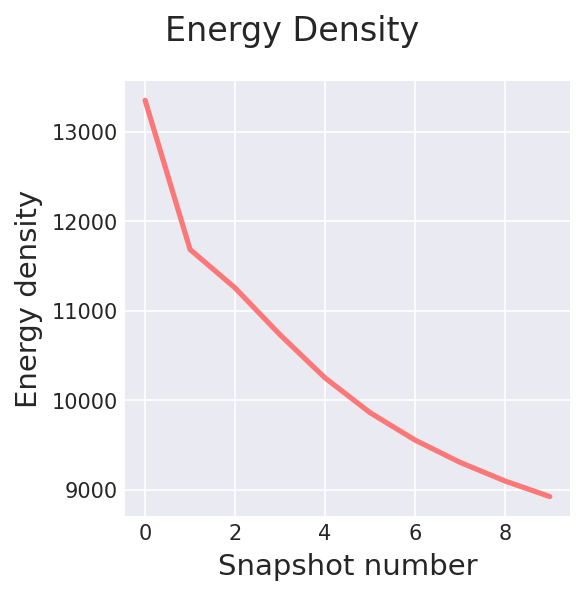

In [20]:


# Common parameters
center = [500,500,500]
box = [1000, 1000]
axes_plot = [0, 2]  # x-z plane
res = 512

o  = arun.Run(snappath='/home/c5046973/agn/gasCloudTest/arepo_t/output_lt', snapbase="snap_")
# Top row - rho, ne, u
# Density (rho)
numsnaps = 10
U = []
for i in range(numsnaps):
    s  = o.loadSnap(snapnum=i)
    U.append(s.u.mean())

U = np.array(U)
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)

# Plot lines
ax.plot(range(numsnaps), U, linewidth=2.5, color='#FF6B6B', alpha=0.9)
plt.ylabel(r'Energy density', fontsize=14)
plt.xlabel(r'Snapshot number', fontsize=14)
fig.suptitle('Energy Density', fontsize=16)

plt.tight_layout()
plt.show()

In [2]:
kpc_rs = ((6.64e-8*100*unit_m)/(100*(70*unit_v/(unit_l*1e3))**2))**(1/3)/(7*unit_l) #scale radius

In [3]:
#Some constants
gamma    = 5./3
unit_m   = 1.989e43
unit_v   = 1.e5
unit_l   = 3.09567758e21
unit_t   = unit_l/unit_v
unit_rho = unit_m/unit_l**3

# ---------- user inputs ----------
# Option A: you have halo mass M_delta (Msun) and want r_delta then r_s via c
M_delta = 100        # e.g. 1e12   # set to None if you don't have M_delta
Delta = 200           # common choices: 200 or virial
c = 7                # concentration (choose per mass/redshift)

# Option B: you already know r_s directly (in same length units as r)
r_s = kpc_rs             # set to your scale radius (e.g., in kpc or arbitrary units)

# If using physical units to compute rho_crit:
H0 = 70.0             # km/s/Mpc, change if needed
G = 6.64e-8    # cm^3 g^-1 s^-2
# Msun = 1.98847e30     # kg
# Mpc = 3.085677581e22  # meters

# ---------- helper functions ----------
def rho_crit(H0_km_s_Mpc):
    # returns critical density in cgs
    H0 = H0_km_s_Mpc*unit_v/(unit_l*1e3)   # s^-1
    return 3.0 * H0**2 / (8*np.pi*G)

def delta_c_from_c(c, Delta=200):
    return (Delta/3.0) * c**3 / (np.log(1.0+c) - c/(1.0+c))

def r_delta_from_M(M_delta, Delta=200, H0_km_s_Mpc=70.0):
    rho_c = rho_crit(H0_km_s_Mpc)   # g/cm^3
    M = M_delta * unit_m
    r_m = (3.0 * M / (4.0*np.pi * Delta * rho_c))**(1.0/3.0)
    return r_m / unit_l  # return in kpc

# ---------- compute values ----------
if M_delta is not None:
    r_delta_Mpc = r_delta_from_M(M_delta, Delta=Delta, H0_km_s_Mpc=H0)
    r_s = r_delta_Mpc / c
    print(f"r_{Delta} = {r_delta_Mpc:.4f} Mpc, r_s = {r_s:.4f} Mpc (c={c})")
else:
    # assume r_s already set (units must match r array units)
    print(f"Using provided r_s = {r_s} (user units) and c = {c} (if you want to compute delta_c)")

# characteristic overdensity
delta_c = delta_c_from_c(c, Delta=Delta)
print("delta_c =", delta_c)

# critical density (useful if you want absolute densities)
rho_c = rho_crit(H0)
rho_c_10Msun_per_kpc3 = rho_c * (unit_l**3) / unit_m
print(f"rho_crit = {rho_c_10Msun_per_kpc3:.3e} 10Msun / kpc^3 (for H0={H0} km/s/Mpc)")

# ---------- NFW profile function ----------
def rho_nfw(r, r_s, delta_c, rho_crit):
    x = r / r_s
    return rho_crit * delta_c / (x * (1.0 + x)**2)





r_200 = 205.7234 Mpc, r_s = 29.3891 Mpc (c=7)
delta_c = 18985.285607780104
rho_crit = 1.371e-08 10Msun / kpc^3 (for H0=70.0 km/s/Mpc)


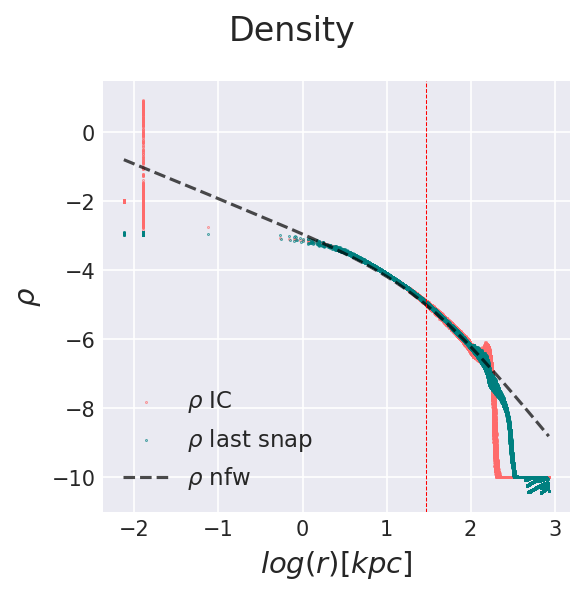

In [4]:




def rvsrho(num=0):
    
    #Read
    o  = arun.Run(snappath='/home/c5046973/agn/gasCloudTest/arepo_t/output_bolalt', snapbase="snap_")
    s  = o.loadSnap(snapnum=num)
    #Centre of Box
    xc = 500.
    yc = 500.
    zc = 500.

    xx    = s.data['pos'][:,0] - xc
    yy    = s.data['pos'][:,1] - yc
    zz    = s.data['pos'][:,2] - zc
    rr = np.sqrt(xx*xx + yy*yy + zz*zz)

    # Plot three lines with rho ~ r^-1, r^-2, r^-3 for comparison
    rho_plot = s.rho[np.argsort(rr)]
    r_plot = rr[np.argsort(rr)]

    return r_plot, rho_plot


plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)

r_plot0, rho_plot0 = rvsrho(0)
r_plot10, rho_plot10 = rvsrho(10)

# Plot lines
ax.scatter(np.log10(r_plot0), np.log10(rho_plot0), s=0.1, color='#FF6B6B', label=r'$\rho$ IC', alpha=0.9)
ax.scatter(np.log10(r_plot10), np.log10(rho_plot10), s=0.1, color='#008080', label=r'$\rho$ last snap', alpha=0.9)


# Find normalization so the comparison curves land in same y-range as data
rho0 = rho_plot10[0]

rho_prof = rho_nfw(r_plot10, r_s, delta_c, rho_c_10Msun_per_kpc3)
ax.plot(np.log10(r_plot10), np.log10((1-0.844)*rho_prof), '--', color='k', label=r'$\rho$ nfw', alpha=0.7)

# ax.plot(np.log10(r_plot10), np.log10(rho0 * (r_plot10/r_plot10[0])**-1), '--', color='dodgerblue', label=r'$\rho \propto r^{-1}$', alpha=0.7)
# ax.plot(np.log10(r_plot10), np.log10(rho0 * (r_plot10/r_plot10[0])**-2), '--', color='forestgreen', label=r'$\rho \propto r^{-2}$', alpha=0.7)
# ax.plot(np.log10(r_plot10), np.log10(rho0 * (r_plot10/r_plot10[0])**-3), '--', color='orange', label=r'$\rho \propto r^{-3}$', alpha=0.7)
plt.axvline(np.log10(kpc_rs), linestyle='--', linewidth=0.5, color='red')
current = plt.xticks()[0]  
# plt.xticks(list(current)+[np.log10(kpc_rs)])

plt.xlabel(r'$log(r) [kpc]$', fontsize=14)
plt.ylabel(r'$\rho$', fontsize=14)
fig.suptitle('Density', fontsize=16)

ax.legend(fontsize=11)

plt.tight_layout()
plt.show()


In [52]:
np.log(rr.max())

6.7497687

/home/c5046973/renv/lib/python3.10/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/c5046973/renv/lib/python3.10/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/c5046973/renv/lib/python3.10/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/c5046973/renv/lib/python3.10/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/c5046973/renv/lib/python3.10/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/home/c5046973/renv/lib/python3.10/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))

Text(0.5, 0.98, 'Density')

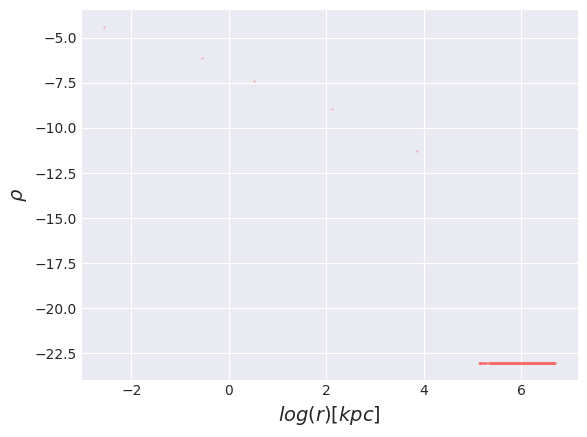

In [46]:
#estimating the scale radius where its an isothermal sphere r^-2

rho_plot = s.rho[np.argsort(rr)]
r_plot = rr[np.argsort(rr)]
exponent = np.gradient(np.log(s.rho[np.argsort(rr)]),np.log(rr[np.argsort(rr)]))
tol=1
mask= ((exponent>2-tol) & (exponent<2+tol))
plt.scatter(np.log(r_plot[mask]), np.log(rho_plot[mask]), s=0.1, color='#FF6B6B', label=r'$\rho$ arepo', alpha=0.9)
rr[mask].mean()
plt.xlabel(r'$log(r) [kpc]$', fontsize=14)
plt.ylabel(r'$\rho$', fontsize=14)
fig.suptitle('Density', fontsize=16)
